# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


In [3]:
# Исправляем опечатку в  названии столбца Genre:
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [4]:
# Проверяем и удаляем дубликаты только в CustomerID

duplicates = df[df.duplicated(subset='CustomerID')]
print("Дубликаты по CustomerID:")
print(duplicates)

Дубликаты по CustomerID:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


В столбце CustomerID нет дубликатов, и DataFrame уже очищен от любых повторений по этому столбцу, поэтому в дальнейшем дубликаты не ищем и не удаляем, чтобы не исказить модель.

In [5]:
# Проверка количества пропусков в каждом признаке
missing_values = df.isnull().sum()
print("Количество пропусков в каждом признаке:")
print(missing_values)

Количество пропусков в каждом признаке:
CustomerID                 0
Gender                    19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64


In [6]:
# Удаляем столбец 'CustomerID'
df = df.drop('CustomerID', axis=1)

# Проверка, что столбец удален
print(df.head())

   Gender   Age  Annual Income (k$)  Spending Score (1-100)
0    Male  19.0                15.0                      39
1    Male   NaN                 NaN                      81
2  Female   NaN                16.0                       6
3  Female  23.0                16.0                      77
4  Female  31.0                17.0                      40


In [7]:
# Предварительная проверка уникальных значений в каждом столбце
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Уникальные значения в столбце {column}: {unique_values}')

Уникальные значения в столбце Gender: ['Male' 'Female' nan 'Feemale']
Уникальные значения в столбце Age: [ 19.  nan  23.  31.  22. 135.  30.  35.  58.  24.  37.  20.  52.  25.
  46.  54.  29.  45.  40.  60.  21.  53.  18.  49.  65.  48.  27.  33.
  59.  50.  47.  51.  69.  70.  67.  63.  43.  68.  32.  26.  57.  38.
  55.  66.  39.  44.  28.  34.  56.  36.  42.  41.]
Уникальные значения в столбце Annual Income (k$): [1.50e+01      nan 1.60e+01 1.70e+01 1.80e+01 1.90e+01 2.00e+01 2.10e+01
 2.30e+01 2.40e+01 2.50e+01 2.80e+01 2.90e+01 3.00e+01 3.30e+01 3.40e+01
 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.20e+01 4.30e+01 4.40e+01 4.60e+01
 4.70e+01 4.80e+01 4.90e+01 5.00e+01 5.40e+01 5.70e+01 5.80e+01 5.90e+01
 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.70e+01 6.90e+01
 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01 7.50e+01 7.60e+01 7.70e+01
 7.80e+01 1.00e+06 7.90e+01 8.10e+01 8.50e+01 8.60e+01 8.70e+01 8.80e+01
 9.30e+01 9.70e+01 9.80e+01 9.90e+01 1.03e+02 1.13e+02 1.20e+02 1.26e

In [8]:
# Сразу преобразуем все аномальные значения
df['Gender'] = df['Gender'].replace({'Feemale': 'Female'})  # Исправление опечатки
df['Gender'] = df['Gender'].fillna('Unknown')  # Замена пропусков на 'Unknown'

In [9]:
# Установить формат отображения чисел
pd.options.display.float_format = '{:,.3f}'.format
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(float)
print(df['Annual Income (k$)'].head())

0   15.000
1      NaN
2   16.000
3   16.000
4   17.000
Name: Annual Income (k$), dtype: float64


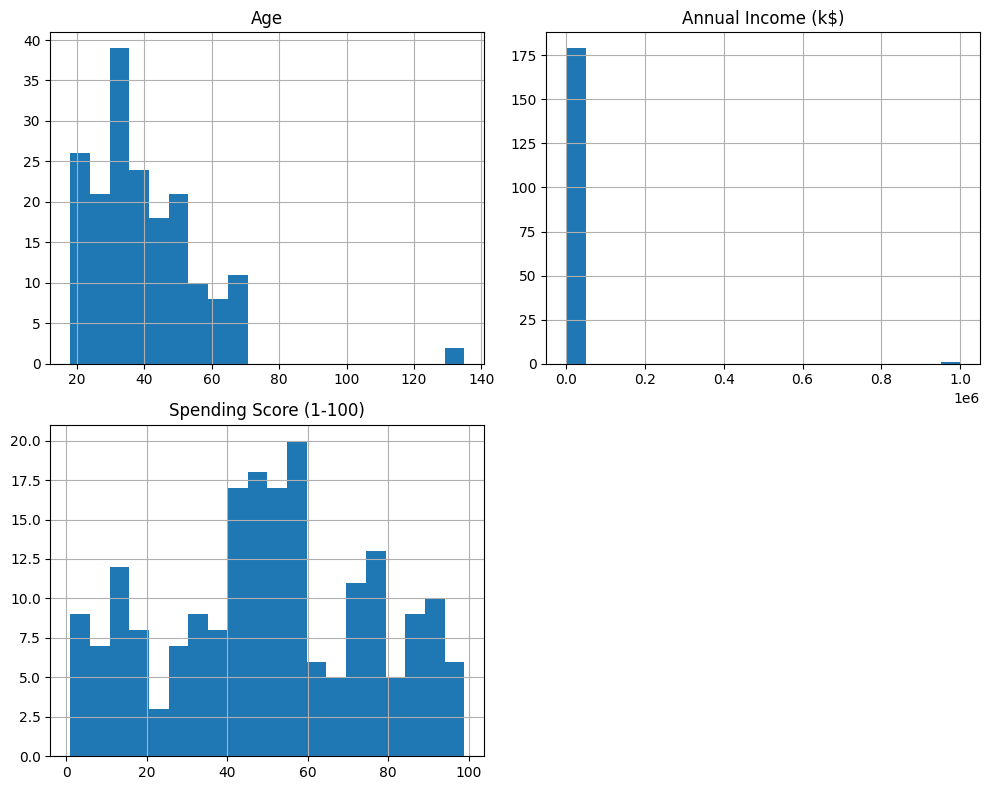

In [10]:
# Гистограммы для числовых признаков
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [11]:
from sklearn.model_selection import train_test_split
# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Spending Score (1-100)']) # Cоздаем новую переменную X, которая содержит все столбцы из датафрейма df, кроме столбца 'Spending Score (1-100)'
y = df['Spending Score (1-100)']

# Разделение данных на обучающую и тестовую выборки (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Проверка форматов данных
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (160, 3)
Размер тестовой выборки: (40, 3)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [12]:
from sklearn.impute import SimpleImputer
# Для числовых признаков (возраст, годовой доход)
numeric_imputer = SimpleImputer(strategy='median')
X_train[['Age', 'Annual Income (k$)']] = numeric_imputer.fit_transform(X_train[['Age', 'Annual Income (k$)']])
# Для категориальных признаков (возраст)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train['Gender'] = categorical_imputer.fit_transform(X_train['Gender'].values.reshape(-1, 1)).ravel()
# Проверка, что пропусков больше нет
print(X_train.isnull().sum())


Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


Age и Annual Income (k$): Медиана является устойчивой к выбросам и лучше отражает центральное положение данных, особенно если в признаке наблюдаются аномальные значения.

  Genre: Для категориального признака разумно использовать моду, так как это минимизирует влияние отсутствующих данных и сохраняет распределение категорий.

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19.000,15.000,39
1,Male,NaN,NaN,81
2,Female,NaN,16.000,6
3,Female,23.000,16.000,77
4,Female,31.000,17.000,40


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [14]:
# Определяем аномальные значения в возрасте
anomalous_ages = X_train[X_train['Age'] > 120]
print("Аномальные значения возраста:")
print(anomalous_ages)


Аномальные значения возраста:
    Gender     Age  Annual Income (k$)
6  Unknown 135.000              18.000
8     Male 135.000              19.000


In [15]:
# Находим моду для возраста
mode_age = X_train['Age'].mode()[0]

# Заменяем аномальные значения на моду
X_train.loc[X_train['Age'] > 90, 'Age'] = mode_age

# Проверяем, что аномальные значения были заменены
print(X_train[X_train['Age'] > 90])

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


При обработке аномальных значений для признака, такого как годовой доход, важно учитывать контекст и понимание данных: сложно принять решение (по удалению или замене) т.к. про возраст точно кто-то пошутил или ошибся, а доход может быть аномально высоким.

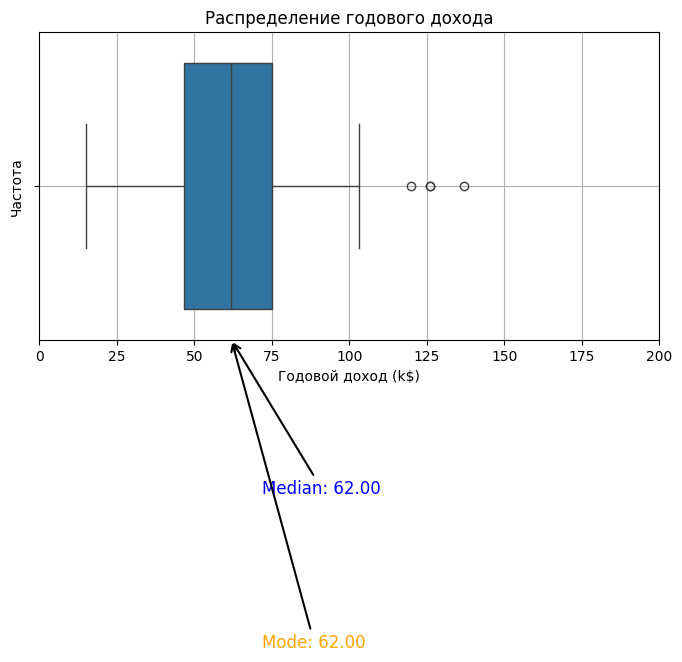

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 4))

# Создание boxplot
ax = sns.boxplot(x=X_train['Annual Income (k$)'])

# Вычисление медианы и моды
median_income = X_train['Annual Income (k$)'].median()
mode_income = X_train['Annual Income (k$)'].mode()[0]  # Используем первый элемент, если несколько мод

# Установка границ оси X
plt.xlim(left=0, right=200)  # Настройте границы по вашему усмотрению

# Аннотация для медианы
ax.annotate(f'Median: {median_income:.2f}', xy=(median_income, 0.5),
            xytext=(median_income + 10, 1),
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=12, color='blue')

# Аннотация для моды
ax.annotate(f'Mode: {mode_income:.2f}', xy=(mode_income, 0.5),
            xytext=(mode_income + 10, 1.5),
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=12, color='orange')

# Заголовок и подписи
plt.title('Распределение годового дохода')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

In [17]:
# Загрузка исходных данных
import pandas as pd

# Чтение файла с помощью pandas
df_original = pd.read_csv('Mall_Customers(1).csv')

# Вывод случайной выборки из 7 строк
print(df_original.sample(7))


     CustomerID   Genre    Age  Annual Income (k$)  Spending Score (1-100)
55           56    Male 47.000              43.000                      41
182         183    Male 46.000                 NaN                      15
93           94  Female 40.000              60.000                      40
156         157    Male 37.000       1,000,000.000                       1
31           32  Female 21.000                 NaN                      73
123         124     NaN 39.000                 NaN                      91
86           87  Female 55.000              57.000                      58


In [18]:
# Исправляем опечатку
df_original.rename(columns={'Genre': 'Gender'}, inplace=True)

In [19]:
# Установка порогового значения для аномально высокого дохода
high_income_threshold = 100  # например, 100k$, можно изменить по необходимости

# Фильтрация данных по условию
high_income_data = df_original[df_original['Annual Income (k$)'] > high_income_threshold]

# Проверка на наличие отсутствующих значений в Gender среди клиентов с аномально высоким доходом
missing_gender_high_income = high_income_data['Gender'].isnull().sum()

# Проверка общего количества клиентов с аномально высоким доходом
total_high_income_count = high_income_data.shape[0]

# Расчет процента клиентов с отсутствующими значениями в Gender
percentage_missing_gender = (missing_gender_high_income / total_high_income_count) * 100 if total_high_income_count > 0 else 0

print(f"Количество клиентов с аномально высоким доходом: {total_high_income_count}")
print(f"Количество отсутствующих значений в Gender: {missing_gender_high_income}")
print(f"Процент отсутствующих значений в Gender среди клиентов с высоким доходом: {percentage_missing_gender:.2f}%")

Количество клиентов с аномально высоким доходом: 12
Количество отсутствующих значений в Gender: 2
Процент отсутствующих значений в Gender среди клиентов с высоким доходом: 16.67%


In [20]:
# Установка порогового значения для аномально высокого дохода
high_income_threshold = 100  # Например, 100k$

# Фильтрация данных по условию
high_income_over_90 = df_original[(df_original['Annual Income (k$)'] > high_income_threshold) & (df_original['Age'] > 90)]

# Проверка количества клиентов
count_high_income_over_90 = high_income_over_90.shape[0]

print(f"Количество клиентов с аномально высоким доходом и возрастом старше 90 лет: {count_high_income_over_90}")
print(high_income_over_90[['Gender', 'Age', 'Annual Income (k$)']])  # Выводим информацию о таких клиентах

Количество клиентов с аномально высоким доходом и возрастом старше 90 лет: 0
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


count   160.000
mean     38.126
std      12.411
min      19.000
25%      30.000
50%      37.000
75%      47.000
max      63.150
Name: Age, dtype: float64


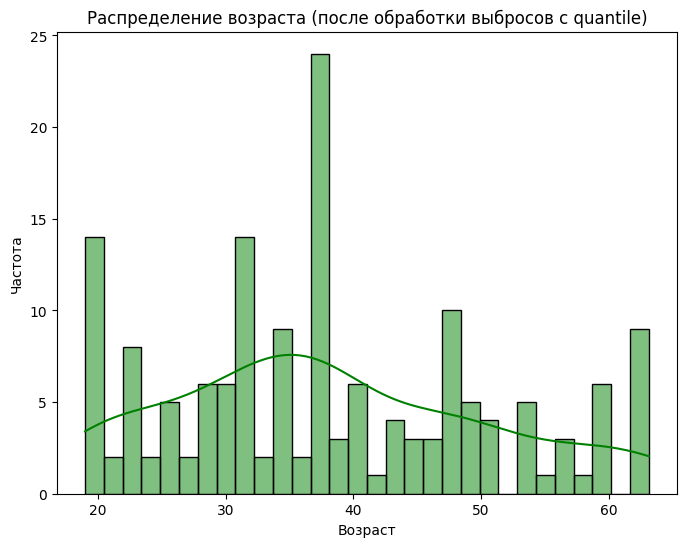

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что X_train уже загружен и содержит столбец 'Age'

# Проверка на наличие пропусков
if X_train['Age'].isnull().sum() > 0:
    print("В данных есть пропуски в столбце 'Age'. Рекомендуется заполнить их перед обработкой выбросов.")

# Определение нижней и верхней границ выбросов с помощью квантилей
lower_bound_age = X_train['Age'].quantile(0.05)  # 5-й процентиль
upper_bound_age = X_train['Age'].quantile(0.95)  # 95-й процентиль

# Замена значений ниже 5-го и выше 95-го процентилей на соответствующие квантильные значения
X_train.loc[X_train['Age'] < lower_bound_age, 'Age'] = lower_bound_age
X_train.loc[X_train['Age'] > upper_bound_age, 'Age'] = upper_bound_age

# Проверка результата
print(X_train['Age'].describe())

# Визуализация распределения возраста после обработки
plt.figure(figsize=(8, 6))
sns.histplot(X_train['Age'], bins=30, kde=True, color='green')
plt.title('Распределение возраста (после обработки выбросов с quantile)')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


1. Метод Winsorizing заменяет аномальные значения на определенный процентиль, что позволяет сохранить информацию о них, но уменьшает их влияние.

Подход:
Заменить значения выше 95-го или 99-го процентиля на значения в этом процентиле.
Это позволит сохранить информацию о клиентах с высокими доходами, не влияя на модель.

2. Использование логарифмической трансформации
Логарифмическая трансформация может помочь уменьшить влияние выбросов, так как она сжимает диапазон значений.

Подход:
Примените логарифмическую трансформацию к годовым доходам.
Это сделает распределение более симметричным и снизит влияние высоких значений.

In [22]:
# Определение 95-го процентиля для годового дохода
income_upper_limit = X_train['Annual Income (k$)'].quantile(0.95)

# Замена значений выше 95-го процентиля на это значение
X_train.loc[X_train['Annual Income (k$)'] > income_upper_limit, 'Annual Income (k$)'] = income_upper_limit

# Проверка результата
print(X_train['Annual Income (k$)'].describe())

count   160.000
mean     59.806
std      22.526
min      15.000
25%      46.750
50%      62.000
75%      75.000
max     103.000
Name: Annual Income (k$), dtype: float64


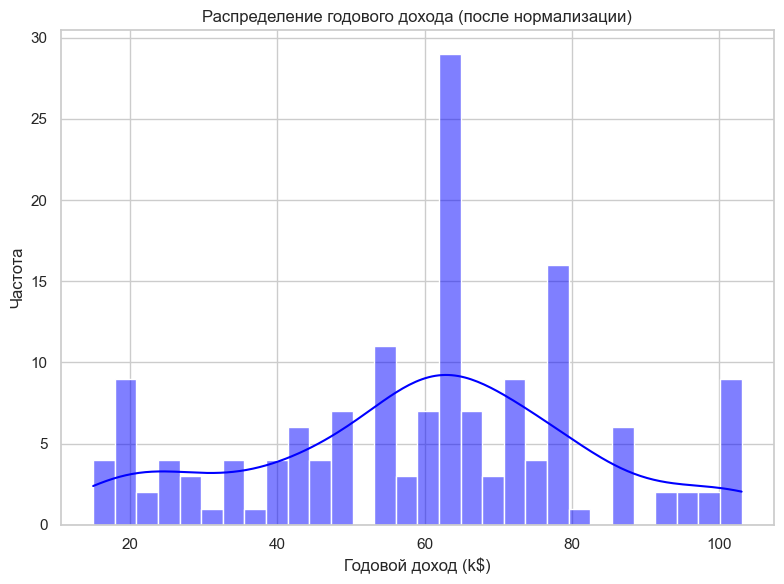

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Определение 95-го процентиля для годового дохода
income_upper_limit = X_train['Annual Income (k$)'].quantile(0.95)

# Замена значений выше 95-го процентиля на это значение
X_train.loc[X_train['Annual Income (k$)'] > income_upper_limit, 'Annual Income (k$)'] = income_upper_limit

# Настройка стиля
sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))

# График распределения годового дохода после нормализации
sns.histplot(X_train['Annual Income (k$)'], bins=30, kde=True, color='blue')
plt.title('Распределение годового дохода (после нормализации)')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Основные Scaler-методы:    
StandardScaler: Приводит данные к распределению с нулевым средним и стандартным отклонением 1 (полезно для данных с нормальным распределением).    
MinMaxScaler: Преобразует данные в диапазон [0, 1] (полезно для данных, где есть фиксированные минимальные и максимальные границы).    

Как выбрать Scaler:    
- Если у данных нет строгого нормального распределения, MinMaxScaler может быть предпочтительным, так как он не предполагает определенного распределения.    
- Если данные приблизительно нормальны, StandardScaler лучше нормализует их с точки зрения среднего и дисперсии.

          Age  Annual Income (k$)
count 160.000             160.000
mean   -0.000               0.000
std     1.003               1.003
min    -1.546              -1.995
25%    -0.657              -0.581
50%    -0.091               0.098
75%     0.717               0.677
max     2.023               1.923


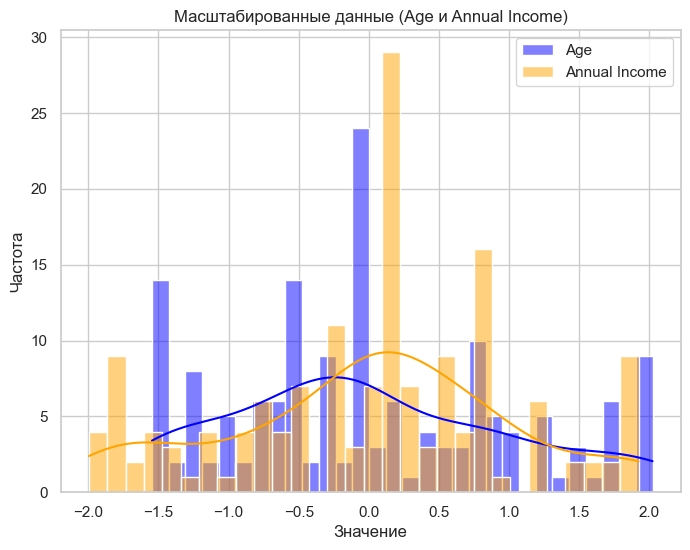

In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Применяем масштабирование только к числовым признакам (например, 'Age' и 'Annual Income (k$)')
X_train[['Age', 'Annual Income (k$)']] = scaler.fit_transform(X_train[['Age', 'Annual Income (k$)']])

# Проверяем результаты
print(X_train[['Age', 'Annual Income (k$)']].describe())

# Визуализация масштабированных данных
plt.figure(figsize=(8, 6))
sns.histplot(X_train['Age'], bins=30, kde=True, color='blue', label='Age')
sns.histplot(X_train['Annual Income (k$)'], bins=30, kde=True, color='orange', label='Annual Income')
plt.title('Масштабированные данные (Age и Annual Income)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.show()

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [25]:
print(X_train.columns)


Index(['Gender', 'Age', 'Annual Income (k$)'], dtype='object')


In [26]:
# Проверка уникальных значений в Gender
print(df['Gender'].unique())

# Проверка значений в Age и Annual Income
print(df[['Age', 'Annual Income (k$)']].describe())

['Male' 'Female' 'Unknown']
          Age  Annual Income (k$)
count 180.000             180.000
mean   39.894           5,615.433
std    16.843          74,531.116
min    18.000              15.000
25%    29.000              42.000
50%    36.000              61.000
75%    49.000              78.000
max   135.000       1,000,000.000


In [27]:
# Замена опечатки и пропусков
df['Gender'] = df['Gender'].replace({'Feemale': 'Female', np.nan: 'Female'})
# Проверка уникальных значений после замены
print(df['Gender'].unique())

['Male' 'Female' 'Unknown']


In [28]:
from sklearn.impute import SimpleImputer
import numpy as np

# Заменяем значения "Unknown" на NaN с использованием mask
X_train['Gender'] = X_train['Gender'].mask(X_train['Gender'] == 'Unknown', np.nan)

# Создание экземпляра SimpleImputer для заполнения NaN в категориальных данных
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Заполнение пропусков в колонке 'Gender'
X_train['Gender'] = categorical_imputer.fit_transform(X_train[['Gender']]).flatten()

# Преобразование значений 'Gender' в бинарные
X_train['Gender'] = X_train['Gender'].replace({'Male': 1, 'Female': 0})

# Проверка результата
print(X_train[['Gender', 'Age', 'Annual Income (k$)']].head())
print(X_train.isnull().sum())  # Проверка на наличие NaN

     Gender    Age  Annual Income (k$)
108       1  2.023               0.142
107       1  1.283               0.142
189       0 -0.172               1.923
14        1 -0.091              -1.773
56        0  1.041              -0.704
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


In [29]:
# Откуда-то берутся NaN (уже после обработки и замены значений)
# Проверка количества пропусков в каждом признаке
# Проверка количества пропусков в каждом признаке
missing_values = X_train.isnull().sum()
print("Количество пропусков в каждом признаке:")
print(missing_values)

Количество пропусков в каждом признаке:
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


In [30]:
# Проверка результата
print(X_train[['Gender', 'Age', 'Annual Income (k$)']].head())
print(X_train.isnull().sum())  # Проверка на наличие NaN

     Gender    Age  Annual Income (k$)
108       1  2.023               0.142
107       1  1.283               0.142
189       0 -0.172               1.923
14        1 -0.091              -1.773
56        0  1.041              -0.704
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


In [31]:
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f'Уникальные значения в столбце {column}: {unique_values}')

Уникальные значения в столбце Gender: [1 0]
Уникальные значения в столбце Age: [ 2.0226112   1.28303809 -0.17185982 -0.09103215  1.04055511 -0.25268748
 -1.54593006 -1.4651024  -0.65682579 -1.22261942  0.79807212  0.07062317
  0.95972745  1.6871764  -0.49517046 -1.30344708  0.15145083 -1.38427474
 -0.73765345  0.39393382 -0.33351514  0.31310615  1.60634874  0.87889979
 -0.89930877  0.71724446 -0.01020449 -1.14179176 -1.06096409 -0.81848111
 -0.98013643  0.47476148 -0.4143428   1.44469342  1.20221043  0.6364168
 -0.57599812  0.23227849  2.01048705  1.52552108  0.55558914  1.76800406
  1.36386576]
Уникальные значения в столбце Annual Income (k$): [ 0.14222302  1.92348985 -1.77263882 -0.70387872 -1.63904381  0.23128636
  0.09769135  1.74536317  0.45394472  0.05315968  0.32034971 -0.74841039
 -1.1937271   1.47817315  1.65629983 -0.52575204 -0.25856201 -0.92653707
 -1.72810715 -1.90623383  0.49847639  1.7008315   0.81019808  1.16645145
  0.18675469  0.00862801 -0.03590366  0.40941305  0.543

In [32]:
X_train.sample(7)

,Gender,Age,Annual Income (k$)
50,0,0.879,-0.793
169,1,-0.495,1.211
123,0,0.071,0.098
70,1,-0.091,-0.481
137,1,-0.495,0.588
115,0,-1.546,0.231
79,0,0.879,-0.259


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [33]:
from sklearn.impute import SimpleImputer
# Для числовых признаков (возраст, годовой доход)
numeric_imputer = SimpleImputer(strategy='median')
X_test[['Age', 'Annual Income (k$)']] = numeric_imputer.fit_transform(X_test[['Age', 'Annual Income (k$)']])
# Для категориальных признаков (возраст)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_test['Gender'] = categorical_imputer.fit_transform(X_test['Gender'].values.reshape(-1, 1)).ravel()
# Проверка, что пропусков больше нет
print(X_test.isnull().sum())


Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


In [34]:
# Определяем аномальные значения в возрасте
anomalous_ages = X_test[X_test['Age'] > 120]
print("Аномальные значения возраста:")
print(anomalous_ages)

Аномальные значения возраста:
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


In [35]:
# Находим моду для возраста
mode_age = X_test['Age'].mode()[0]

# Заменяем аномальные значения на моду
X_test.loc[X_test['Age'] > 90, 'Age'] = mode_age

# Проверяем, что аномальные значения были заменены
print(X_test[X_test['Age'] > 90])

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


count   40.000
mean    39.698
std     11.937
min     23.950
25%     31.750
50%     36.000
75%     49.000
max     65.000
Name: Age, dtype: float64


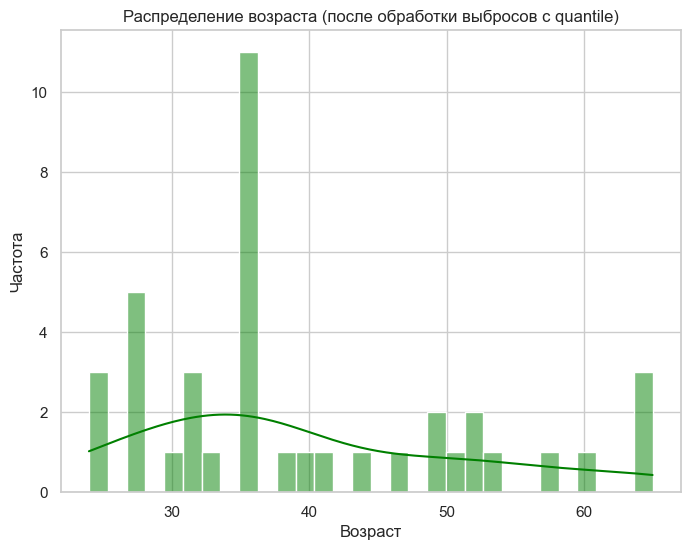

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что X_test уже загружен и содержит столбец 'Age'

# Проверка на наличие пропусков
if X_test['Age'].isnull().sum() > 0:
    print("В данных есть пропуски в столбце 'Age'. Рекомендуется заполнить их перед обработкой выбросов.")

# Определение нижней и верхней границ выбросов с помощью квантилей
lower_bound_age = X_test['Age'].quantile(0.05)  # 5-й процентиль
upper_bound_age = X_test['Age'].quantile(0.95)  # 95-й процентиль

# Замена значений ниже 5-го и выше 95-го процентилей на соответствующие квантильные значения
X_test.loc[X_test['Age'] < lower_bound_age, 'Age'] = lower_bound_age
X_test.loc[X_test['Age'] > upper_bound_age, 'Age'] = upper_bound_age

# Проверка результата
print(X_test['Age'].describe())

# Визуализация распределения возраста после обработки
plt.figure(figsize=(8, 6))
sns.histplot(X_test['Age'], bins=30, kde=True, color='green')
plt.title('Распределение возраста (после обработки выбросов с quantile)')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

In [37]:
# Определение 95-го процентиля для годового дохода
income_upper_limit = X_test['Annual Income (k$)'].quantile(0.95)

# Замена значений выше 95-го процентиля на это значение
X_test.loc[X_test['Annual Income (k$)'] > income_upper_limit, 'Annual Income (k$)'] = income_upper_limit

# Проверка результата
print(X_test['Annual Income (k$)'].describe())

count    40.000
mean     60.517
std      27.170
min      17.000
25%      38.750
50%      60.000
75%      85.500
max     113.350
Name: Annual Income (k$), dtype: float64


         Age  Annual Income (k$)
count 40.000              40.000
mean  -0.000               0.000
std    1.013               1.013
min   -1.336              -1.622
25%   -0.674              -0.811
50%   -0.314              -0.019
75%    0.789               0.931
max    2.147               1.969


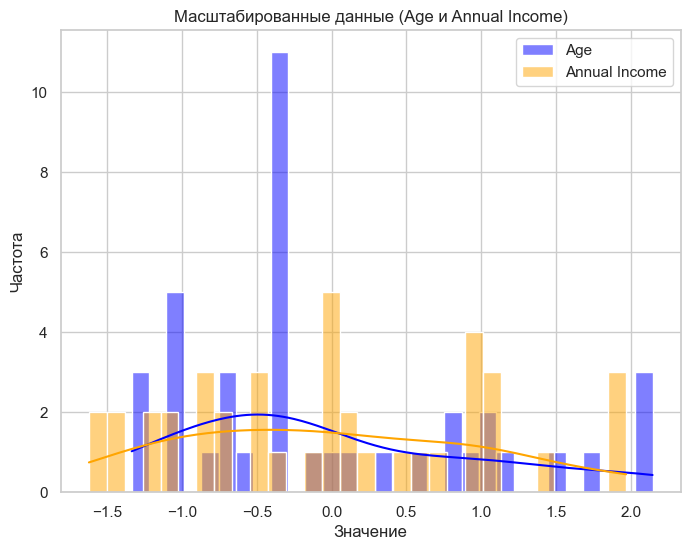

In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Применяем масштабирование только к числовым признакам (например, 'Age' и 'Annual Income (k$)')
X_test[['Age', 'Annual Income (k$)']] = scaler.fit_transform(X_test[['Age', 'Annual Income (k$)']])

# Проверяем результаты
print(X_test[['Age', 'Annual Income (k$)']].describe())

# Визуализация масштабированных данных
plt.figure(figsize=(8, 6))
sns.histplot(X_test['Age'], bins=30, kde=True, color='blue', label='Age')
sns.histplot(X_test['Annual Income (k$)'], bins=30, kde=True, color='orange', label='Annual Income')
plt.title('Масштабированные данные (Age и Annual Income)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [39]:
print(X_test.columns)

Index(['Gender', 'Age', 'Annual Income (k$)'], dtype='object')


In [40]:
from sklearn.impute import SimpleImputer
import numpy as np

# Заменяем значения "Unknown" на NaN с использованием mask
X_test['Gender'] = X_test['Gender'].mask(X_test['Gender'] == 'Unknown', np.nan)

# Создание экземпляра SimpleImputer для заполнения NaN в категориальных данных
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Заполнение пропусков в колонке 'Gender'
X_test['Gender'] = categorical_imputer.fit_transform(X_test[['Gender']]).flatten()

# Преобразование значений 'Gender' в бинарные
X_test['Gender'] = X_test['Gender'].replace({'Male': 1, 'Female': 0})

# Проверка результата
print(X_test[['Gender', 'Age', 'Annual Income (k$)']].head())
print(X_test.isnull().sum())  # Проверка на наличие NaN

     Gender    Age  Annual Income (k$)
58        0 -1.077              -0.541
40        0  2.147              -0.839
34        0  0.789              -1.026
102       1  2.147               0.055
184       0  0.111               1.434
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


In [46]:
X_test.sample(7)

,Gender,Age,Annual Income (k$)
40,0,2.147,-0.839
198,1,-0.314,1.969
73,0,1.722,-0.392
177,1,-1.077,1.024
59,1,1.129,-0.541
95,0,-1.332,-0.019
38,0,-0.314,-0.877
